In [ ]:
!nvidia-smi

Tue Apr 29 07:34:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


YOLO относится к сверточным нейронным сетям (Convolutional Neural Networks, CNN), которые специализируются на анализе изображений. Это полностью сверточная архитектура, которая применяется для решения задачи детекции объектов.

* Сверточные нейронные сети — это тип нейронных сетей, специально разработанный для работы с данными, имеющими структуру сетки, таких как изображения или видео.

* Сверточная архитектура — это тип архитектуры нейронной сети, основанный на использовании сверточных слоёв (convolutional layers). Этот тип архитектуры специально разработан для эффективной обработки данных, которые имеют пространственную структуру, такие как изображения

Изображение подается в сверточную нейронную сеть (CNN). CNN последовательно проходит через слои, постепенно извлекая признаки из изображения.

На выходе CNN генерирует карту признаков, которая затем делится на сетку фиксированного размера (например, 13x13 клеток). Каждая клетка сетки отвечает за прогнозирование вероятности наличия ключевой точки и ее координат.

In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
import cv2

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TAOL6W0ydsnQRbXKPD5Q")
project = rf.workspace("brainimages").project("test-all-elements")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Test-all-elements-1 in yolov8:: 100%|██████████| 2624/2624 [00:00<00:00, 3869.48it/s]


In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11m-pose.pt")
results = model.train(data='/content/Test-all-elements-1/data.yaml', epochs=3, imgsz=640, plots=True)

100%|██████████| 40.5M/40.5M [00:00<00:00, 245MB/s]


Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=pose, mode=train, model=yolo11m-pose.pt, data=/content/Test-all-elements-1/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 40.8MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[21, 3]
Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, Tru

100%|██████████| 5.35M/5.35M [00:00<00:00, 142MB/s]


AMP: checks passed ✅


train: Scanning /content/Test-all-elements-1/train/labels... 915 images, 2 backgrounds, 0 corrupt: 100%|██████████| 915/915 [00:00<00:00, 1371.10it/s]

train: New cache created: /content/Test-all-elements-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Test-all-elements-1/valid/labels... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<00:00, 493.69it/s]


val: New cache created: /content/Test-all-elements-1/valid/labels.cache
Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 112 weight(decay=0.0), 122 weight(decay=0.0005), 121 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        1/3      8.29G      1.109      9.798     0.6635      0.718      1.336          6        640: 100%|██████████| 58/58 [00:37<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.06it/s]

                   all        261        261      0.412      0.973       0.67      0.442          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        2/3      8.39G      1.099      8.179     0.4614     0.6969      1.357          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        261        261      0.925      0.958      0.981      0.646          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        3/3      8.46G      1.028       7.39     0.4237     0.6143      1.286          7        640: 100%|██████████| 58/58 [00:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.00it/s]

                   all        261        261      0.959      0.987      0.991      0.739     0.0525     0.0345    0.00461   0.000569



3 epochs completed in 0.035 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 42.2MB
Optimizer stripped from runs/pose/train/weights/best.pt, 42.2MB

Validating runs/pose/train/weights/best.pt...
Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-pose summary (fused): 134 layers, 20,891,344 parameters, 0 gradients, 71.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]


                   all        261        261      0.959      0.986      0.991      0.738     0.0538     0.0345    0.00461   0.000567
Speed: 0.2ms preprocess, 6.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/pose/train


In [ ]:
model = YOLO("yolo11m-pose.pt")
results = model("42.png")
print(results)


image 1/1 /content/42.png: 384x640 1 person, 31.9ms
Speed: 2.3ms preprocess, 31.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'person'}
obb: None
orig_img: array([[[ 50,  60,  66],
        [ 50,  60,  66],
        [ 50,  60,  66],
        ...,
        [ 25,  48, 137],
        [ 25,  48, 138],
        [ 25,  47, 139]],

       [[ 50,  60,  66],
        [ 50,  60,  66],
        [ 50,  60,  66],
        ...,
        [ 25,  48, 137],
        [ 25,  48, 138],
        [ 25,  47, 139]],

       [[ 50,  60,  66],
        [ 50,  60,  66],
        [ 50,  60,  66],
        ...,
        [ 25,  48, 137],
        [ 25,  48, 138],
        [ 25,  47, 139]],

       ...,

       [[193, 196, 196],
        [193, 196, 196],
        [193, 196, 196],
        ...,
        [157, 163, 167],
        [157,

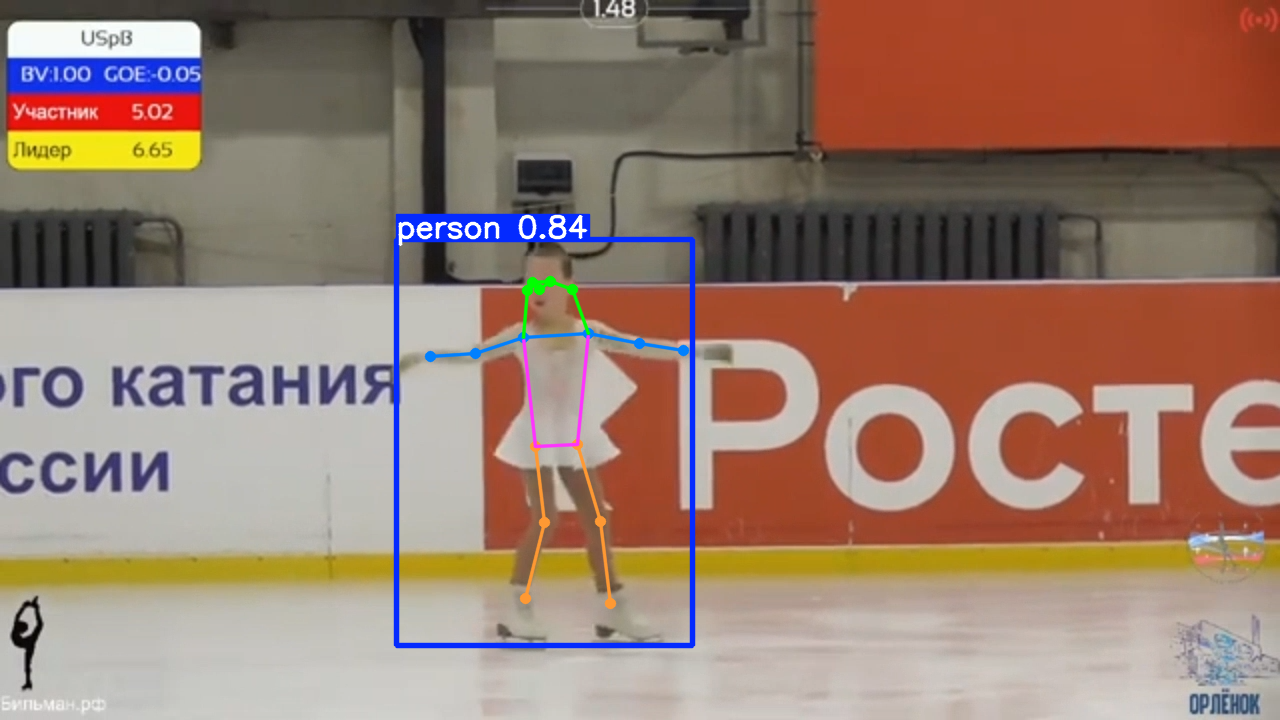

In [ ]:
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11m-pose.pt")
results = model("6.png")
print(results)

100%|██████████| 40.5M/40.5M [00:00<00:00, 65.5MB/s]



image 1/1 /content/6.png: 384x640 1 person, 151.3ms
Speed: 12.8ms preprocess, 151.3ms inference, 448.7ms postprocess per image at shape (1, 3, 384, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'person'}
obb: None
orig_img: array([[[ 71,  83,  82],
        [ 72,  84,  83],
        [ 72,  84,  83],
        ...,
        [ 44,  54,  46],
        [ 44,  56,  43],
        [ 44,  56,  42]],

       [[ 71,  83,  82],
        [ 72,  84,  83],
        [ 72,  84,  83],
        ...,
        [ 44,  53,  47],
        [ 44,  56,  44],
        [ 44,  56,  43]],

       [[ 70,  81,  80],
        [ 71,  83,  82],
        [ 71,  83,  82],
        ...,
        [ 42,  50,  46],
        [ 42,  53,  44],
        [ 40,  52,  41]],

       ...,

       [[153, 158, 157],
        [152, 156, 156],
        [151, 155, 155],
        ...,
        [153, 157, 159],
        [

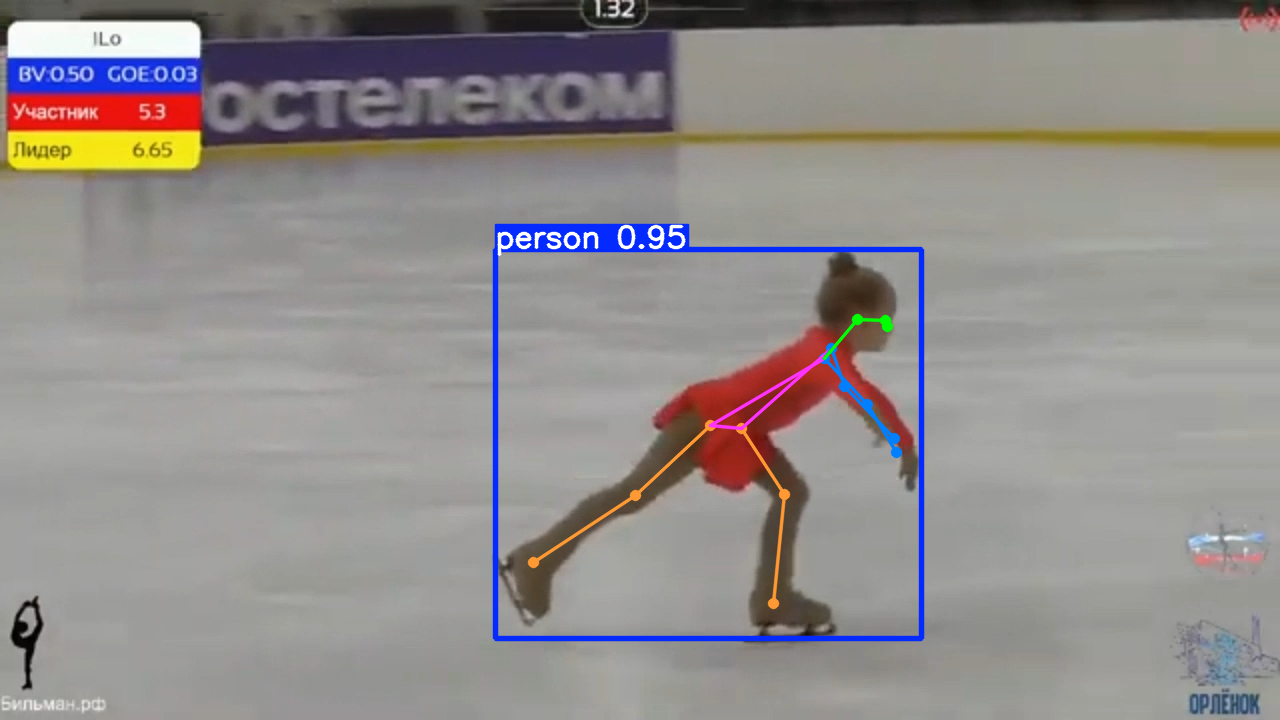

In [ ]:
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)

In [ ]:
from ultralytics import YOLO
import cv2

# Загружаем модель
model = YOLO("yolo11m-pose.pt")

# Открываем видеофайл
input_path = "/content/1F Mazunina.mp4"
cap = cv2.VideoCapture(input_path)

# Получаем параметры видео
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Создаем VideoWriter для сохранения результатов
output_path = "output_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Выполняем предсказание
    results = model(frame)

    # Визуализируем результаты
    annotated_frame = results[0].plot()

    # Записываем кадр
    out.write(annotated_frame)

# Освобождаем ресурсы
cap.release()
out.release()


0: 384x640 1 person, 26.3ms
Speed: 2.3ms preprocess, 26.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 25.5ms
Speed: 2.3ms preprocess, 25.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 25.5ms
Speed: 2.2ms preprocess, 25.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 25.5ms
Speed: 2.2ms preprocess, 25.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.0ms
Speed: 2.2ms preprocess, 20.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.0ms
Speed: 2.4ms preprocess, 20.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.0ms
Speed: 2.2ms preprocess, 20.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.0ms
Speed: 3.5ms preprocess, 20.0ms inference, 1.7ms postprocess per image at shape (1, 3, 38

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/pose/train/weights/best.pt')
results = model("42.png")
print(results)


image 1/1 /content/42.png: 384x640 14 persons, 53.0ms
Speed: 1.8ms preprocess, 53.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'person'}
obb: None
orig_img: array([[[ 50,  60,  66],
        [ 50,  60,  66],
        [ 50,  60,  66],
        ...,
        [ 25,  48, 137],
        [ 25,  48, 138],
        [ 25,  47, 139]],

       [[ 50,  60,  66],
        [ 50,  60,  66],
        [ 50,  60,  66],
        ...,
        [ 25,  48, 137],
        [ 25,  48, 138],
        [ 25,  47, 139]],

       [[ 50,  60,  66],
        [ 50,  60,  66],
        [ 50,  60,  66],
        ...,
        [ 25,  48, 137],
        [ 25,  48, 138],
        [ 25,  47, 139]],

       ...,

       [[193, 196, 196],
        [193, 196, 196],
        [193, 196, 196],
        ...,
        [157, 163, 167],
        [15

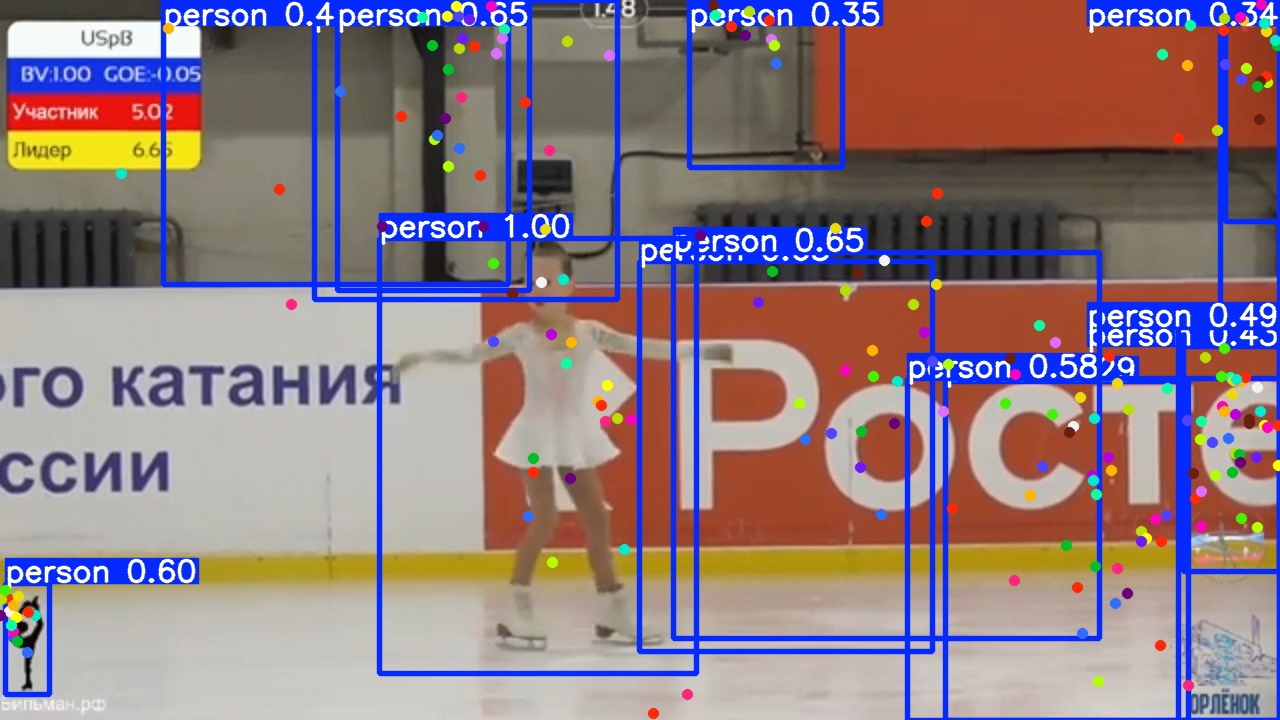

In [ ]:
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)

In [ ]:
import cv2
import numpy as np
import torch
from ultralytics import YOLO

# Функция для рисования линий между ключевыми точками
def draw_skeleton(image, keypoints, confs, connections, color):
    for (p1, p2) in connections:
        if confs[p1] > 0.7 and confs[p2] > 0.7:  # Проверка уверенности точек
            x1, y1 = int(keypoints[p1][0]), int(keypoints[p1][1])
            x2, y2 = int(keypoints[p2][0]), int(keypoints[p2][1])
            if (x1, y1) != (0, 0) and (x2, y2) != (0, 0):  # Игнорирование точек в (0, 0)
                cv2.line(image, (x1, y1), (x2, y2), color, 2)

# Основная функция для обработки кадра и рисования скелета
def frame2skeleton(image, model):
    colors = {
        "green": (0, 255, 0),
        "blue": (255, 0, 0),
        "red": (0, 0, 255),
        "rose": (152, 52, 219),
        "white": (255, 255, 255),
        "lightblue": (51, 219, 0)
    }

    with torch.no_grad():
        results = model(image)[0]

        if hasattr(results, 'boxes') and hasattr(results.boxes, 'cls') and len(results.boxes.cls) > 0:
            classes_names = results.names
            classes = results.boxes.cls.cpu().numpy()
            boxes = results.boxes.xyxy.cpu().numpy().astype(np.int32)
            boxes_confs = results.boxes.conf.cpu().numpy()

            # Обработка ключевых точек
            if results.keypoints:
                keypoints = results.keypoints.data.cpu().numpy()
                confs = results.keypoints.conf.cpu().numpy()

                for i, (class_id, box_conf, box, kp, conf) in enumerate(zip(classes, boxes_confs, boxes, keypoints, confs)):
                    # Визуализация bbox
                    class_name = classes_names[int(class_id)]
                    color = colors['lightblue']
                    x1, y1, x2, y2 = box
                    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
                    cv2.putText(image, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

                    # Визуализация ключевых точек с номерами
                    for j, (point, point_conf) in enumerate(zip(kp, conf)):
                        if point_conf > 0.7:
                            x, y = int(point[0]), int(point[1])
                            if (x, y) != (0, 0):
                                cv2.circle(image, (x, y), 5, colors['white'], -1)
                                cv2.putText(image, str(j), (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors['white'], 2)

                    # Рисование скелета
                    draw_skeleton(image, kp, conf, [(6, 5), (5, 4), (4, 3), (3, 2), (2, 7), (7, 8), (8, 9), (9, 10)], colors['green'])  # Руки
                    draw_skeleton(image, kp, conf, [(16, 15), (15, 14), (14, 13), (13, 12), (12, 17), (17, 18), (18, 19), (19, 20)], colors['blue'])  # Ноги
                    draw_skeleton(image, kp, conf, [(2, 11), (11, 12)], colors['rose'])  # Тело
                    draw_skeleton(image, kp, conf, [(0, 1), (1, 2)], colors['red'])  # Голова

                return image
        else:
            return None



model = YOLO('/content/runs/pose/train2/weights/best.pt')

# Открытие видео
path = '/content/1 бильман  МАЗУНИНА.mp4'
cap = cv2.VideoCapture(path)
output_frames = []

if not cap.isOpened():
    print("Ошибка: не удалось открыть видео.")
else:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Преобразование кадра в RGB для модели
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Применение модели для отрисовки скелетов на кадре
        frame_with_skeleton = frame2skeleton(frame_rgb, model)

        if frame_with_skeleton is not None:
            # Преобразование обратно в BGR для сохранения
            frame_with_skeleton_bgr = cv2.cvtColor(frame_with_skeleton, cv2.COLOR_RGB2BGR)
            output_frames.append(frame_with_skeleton_bgr)
        else:
            print("Предупреждение: на одном из кадров нет ключевых точек")

    # Проверка на наличие обработанных кадров
    if output_frames:
        # Настройка параметров выходного видео
        height, width, layers = output_frames[0].shape
        output_video_path = path[:-4] + ' - наш скелет (21 точка).mp4'
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        video_out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (width, height))

        for frame in output_frames:
            video_out.write(frame)

        cap.release()
        video_out.release()
        print("Видео успешно сохранено по пути:", output_video_path)
    else:
        print("Ошибка: выходное видео не может быть сохранено, так как ни один кадр не был обработан.")


In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11m-pose.pt")
results = model.train(data='/content/Test-all-elements-1/data.yaml', epochs=300, imgsz=640, plots=True)

100%|██████████| 40.5M/40.5M [00:00<00:00, 94.6MB/s]


Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=pose, mode=train, model=yolo11m-pose.pt, data=/content/Test-all-elements-1/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 19.6MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[21, 3]
Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, Tru

100%|██████████| 5.35M/5.35M [00:00<00:00, 93.4MB/s]


AMP: checks passed ✅


train: Scanning /content/Test-all-elements-1/train/labels... 915 images, 2 backgrounds, 0 corrupt: 100%|██████████| 915/915 [00:00<00:00, 1478.32it/s]

train: New cache created: /content/Test-all-elements-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Test-all-elements-1/valid/labels... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<00:00, 516.36it/s]

val: New cache created: /content/Test-all-elements-1/valid/labels.cache


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 112 weight(decay=0.0), 122 weight(decay=0.0005), 121 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/300      8.32G      1.109      9.798     0.6635      0.718      1.336          6        640: 100%|██████████| 58/58 [00:37<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]

                   all        261        261      0.412      0.973      0.692       0.46          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/300      8.43G      1.184      8.384     0.4562     0.7961      1.391          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]


                   all        261        261      0.104     0.0766     0.0235    0.00706          0          0          0          0

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/300       8.5G      1.215      7.713      0.412     0.7827      1.414          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]


                   all        261        261      0.794      0.762      0.823      0.484     0.0289     0.0268    0.00245   0.000253

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/300      8.58G      1.208      7.283     0.3968     0.7796      1.389          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.71it/s]

                   all        261        261      0.791      0.548      0.669      0.374      0.017     0.0153    0.00142   0.000268



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/300      8.64G       1.12      6.967     0.3701     0.7225      1.324          3        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        261        261      0.888      0.882      0.954      0.639     0.0768     0.0536    0.00932    0.00106



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/300      8.71G      1.162      6.791     0.3542     0.7366      1.398         10        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]

                   all        261        261      0.718      0.609      0.715      0.341      0.135     0.0805     0.0347    0.00477



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/300      9.17G      1.129      6.616      0.335     0.6896      1.363         12        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        261        261      0.356      0.253      0.224     0.0577    0.00121    0.00766   0.000184   2.76e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/300      9.24G      1.121      6.464     0.3102     0.6816       1.33          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        261        261      0.963      0.935      0.986      0.726      0.174      0.169     0.0553    0.00756



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/300      9.31G        1.1      6.426     0.2906     0.6859      1.324          4        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.83it/s]


                   all        261        261      0.883      0.785      0.872      0.527      0.195      0.126      0.033    0.00387

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/300      9.38G      1.054      6.241       0.27     0.6566      1.313          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]

                   all        261        261      0.926       0.95      0.979      0.692      0.242      0.226     0.0833    0.00955



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/300      9.45G      1.052      6.249     0.2738     0.6315      1.306          9        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.71it/s]

                   all        261        261      0.992      0.993      0.995      0.756       0.37      0.322      0.171     0.0226



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/300      9.52G      1.021      6.098     0.2425     0.5909      1.286          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        261        261      0.691      0.766      0.746      0.408      0.223      0.169        0.1     0.0144



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/300      9.59G      1.045      5.909     0.2377     0.5964      1.312          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        261        261      0.976          1      0.993      0.735      0.413       0.41      0.236     0.0283



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/300      9.66G     0.9809      6.026     0.2398     0.5806       1.26          4        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]

                   all        261        261      0.979      0.989      0.994      0.747      0.353      0.356      0.176     0.0222



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/300      9.73G     0.9924      5.852     0.2314     0.5716      1.269          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]

                   all        261        261      0.972      0.985      0.993       0.75      0.375      0.352      0.222     0.0272



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/300      9.81G      1.006      5.803     0.2435     0.5656       1.29          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.07it/s]

                   all        261        261      0.987          1      0.995      0.749      0.383      0.387      0.208     0.0265



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/300      9.88G     0.9379       5.75     0.2213     0.5411       1.23          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

                   all        261        261      0.427      0.284      0.304      0.131      0.116     0.0613     0.0318    0.00442



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/300      9.95G     0.9338      5.666     0.2093     0.5403      1.231         10        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]

                   all        261        261      0.993      0.973      0.994      0.727      0.543      0.471      0.339     0.0508



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/300      10.1G     0.9372      5.621     0.2158     0.5527      1.237          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        261        261      0.966      0.992      0.992      0.749      0.498       0.41      0.289      0.043



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/300      10.2G     0.9297      5.605     0.2089     0.5433      1.205          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]

                   all        261        261      0.992          1      0.995      0.752      0.448      0.444      0.278     0.0466



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/300      10.3G     0.9287      5.488     0.2215     0.5491      1.241          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        261        261      0.992          1      0.994      0.774      0.525      0.529      0.389      0.059



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/300      10.4G     0.9596      5.428      0.197     0.5384      1.258          3        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        261        261      0.981      0.975      0.993      0.755      0.498      0.464      0.347     0.0614



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/300      10.5G     0.9363      5.384     0.2054     0.5271      1.245          4        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        261        261      0.995      0.996      0.995      0.776      0.546      0.544      0.435     0.0816



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/300      10.7G      0.912      5.334     0.2159     0.5168      1.231          3        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        261        261      0.987      0.996      0.995      0.772      0.541      0.551       0.44     0.0799



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/300      10.8G     0.9381      5.403     0.2075     0.5308       1.23          9        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.991          1      0.995      0.772      0.549      0.548      0.405     0.0642



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/300      10.9G     0.9194      5.382     0.1963     0.5263      1.211          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]

                   all        261        261      0.983          1      0.995      0.782      0.574      0.571      0.462     0.0711



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/300        11G     0.9214      5.266     0.1916     0.5274      1.223          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        261        261      0.994          1      0.995      0.756      0.633      0.636      0.498     0.0919



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/300      11.1G     0.9022      5.202     0.2055     0.5082      1.211          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        261        261      0.996          1      0.995      0.778      0.576      0.575      0.399     0.0707



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/300      11.3G     0.8997      5.224     0.2007     0.5191      1.212          4        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.989      0.992      0.994      0.681      0.589      0.579      0.453     0.0789



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/300      11.4G     0.9084      5.049     0.1864     0.4894      1.207         10        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.996      0.999      0.995      0.777      0.628      0.628      0.506     0.0986



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/300      11.5G     0.8768      5.035     0.1879     0.4997      1.204          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        261        261      0.991          1      0.995      0.791      0.606      0.602      0.504      0.103



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/300      11.6G     0.8738      5.041      0.191     0.5073      1.198          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.992      0.996      0.994      0.783      0.622      0.613      0.508     0.0911



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/300      11.8G     0.8716      5.064     0.1871     0.4897      1.187          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        261        261      0.992          1      0.995      0.757      0.589       0.59      0.437     0.0818



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/300      11.9G     0.8938      4.999     0.1849        0.5      1.199          3        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        261        261      0.978      0.992      0.994      0.696      0.539      0.548      0.389      0.069



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/300        12G      0.844      4.933     0.1761     0.4715      1.161          3        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        261        261      0.973      0.983      0.994       0.77      0.628      0.633      0.549      0.106



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/300      12.1G     0.8854      4.835      0.184      0.485      1.198          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        261        261      0.985      0.996      0.993      0.748      0.609      0.609       0.54      0.119



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/300      12.2G     0.8558      4.766     0.1908     0.4884      1.193          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        261        261      0.999          1      0.995        0.8      0.682      0.682      0.632      0.134



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/300      12.3G     0.8603      4.853     0.1903     0.4901       1.19          2        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        261        261      0.995          1      0.995       0.79      0.664      0.667      0.575      0.116



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/300      12.5G     0.8535      4.858     0.1722     0.4814      1.158          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        261        261      0.944      0.967      0.982      0.684      0.543      0.525      0.419     0.0875



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/300      12.6G       0.88      4.891     0.1908     0.4932      1.187          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  3.00it/s]

                   all        261        261      0.992          1      0.995      0.802      0.688      0.693      0.593      0.131



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/300      12.7G     0.8502      4.786     0.1862     0.4893      1.179          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        261        261      0.995          1      0.995        0.8      0.709      0.713      0.638      0.135



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/300      12.8G     0.8328      4.759     0.1783     0.4686      1.169          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        261        261      0.998          1      0.995      0.795      0.696      0.697      0.604      0.131



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/300      12.9G     0.8579      4.738      0.184     0.4882      1.193          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]

                   all        261        261      0.995          1      0.995      0.795       0.68      0.661      0.589       0.13



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/300      13.1G      0.866      4.802     0.1798     0.4903      1.196          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.04it/s]

                   all        261        261      0.991      0.996      0.995      0.802      0.701      0.701      0.627      0.144



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/300      13.6G     0.8451      4.681     0.1841     0.4678      1.176          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.02it/s]

                   all        261        261      0.991          1      0.994      0.807      0.683       0.69      0.616      0.144



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/300      8.89G     0.8877      4.681     0.1824     0.4977      1.209          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        261        261      0.997          1      0.995      0.824      0.737      0.739      0.659      0.155



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/300      8.89G      0.853       4.74      0.184     0.4851      1.176          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        261        261      0.997      0.996      0.995      0.784       0.66      0.648      0.541      0.104



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/300      8.89G     0.8156      4.558     0.1772     0.4531      1.154          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        261        261      0.987      0.996      0.992      0.789      0.671      0.648      0.525       0.11



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/300      8.89G     0.8438      4.582     0.1685     0.4621      1.179          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.995          1      0.995      0.802      0.709      0.701      0.655      0.156



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/300      8.89G     0.8725      4.612     0.1873     0.4922      1.198          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        261        261      0.996          1      0.994      0.799      0.724      0.724      0.636      0.136



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/300      8.89G     0.8452      4.522      0.172      0.479      1.177          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        261        261      0.989          1      0.995      0.825      0.765      0.762      0.709      0.173



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/300      8.89G     0.8347      4.469     0.1632     0.4696      1.167          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.12it/s]

                   all        261        261      0.988          1      0.994      0.807       0.74      0.724      0.631      0.148



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/300      8.89G     0.8398      4.485     0.1765     0.4731      1.177          4        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.07it/s]

                   all        261        261      0.996          1      0.995      0.817       0.77      0.774       0.72      0.162



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/300      8.89G     0.8077      4.471     0.1729     0.4586       1.14          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.00it/s]

                   all        261        261      0.996          1      0.994      0.815      0.775      0.778      0.689      0.157



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/300      8.89G     0.8195      4.527     0.1774     0.4548      1.149          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.70it/s]

                   all        261        261      0.998          1      0.995       0.81      0.742      0.743      0.679      0.166



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/300      8.96G     0.8413      4.439     0.1695     0.4775      1.163          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]

                   all        261        261      0.995          1      0.995      0.812      0.743      0.747      0.648      0.148



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/300      9.04G     0.8219      4.517     0.1755     0.4725      1.153          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]

                   all        261        261      0.992          1      0.995      0.817      0.786      0.793      0.705      0.177



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/300      9.17G     0.8009       4.38     0.1618      0.438      1.137          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        261        261          1      0.999      0.995      0.813      0.811      0.808      0.748      0.188



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/300      9.28G     0.8151      4.431     0.1718     0.4613       1.15          9        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        261        261      0.995          1      0.995      0.819       0.77      0.774      0.717      0.201



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/300      9.41G     0.8004      4.327     0.1757     0.4412      1.151          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]

                   all        261        261      0.999          1      0.995      0.816      0.795      0.793      0.747      0.193



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/300      9.52G     0.8134      4.356     0.1672     0.4479      1.141          4        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]

                   all        261        261          1          1      0.995      0.822      0.785      0.778      0.718      0.192



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/300      9.62G     0.8311      4.373     0.1843     0.4619      1.169          3        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]

                   all        261        261          1          1      0.995      0.815      0.777      0.778      0.729      0.184



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/300      9.76G     0.7714       4.28     0.1778     0.4293      1.123          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]

                   all        261        261      0.995          1      0.994      0.827      0.778      0.782      0.699      0.174



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/300      9.87G     0.7769       4.28     0.1805      0.433      1.118         10        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.80it/s]

                   all        261        261          1          1      0.995      0.805      0.769      0.762      0.725      0.172



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/300        10G     0.7999      4.384     0.1761     0.4566      1.142          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.79it/s]

                   all        261        261      0.993          1      0.995      0.817      0.765       0.77        0.7      0.182



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/300      10.1G     0.7831      4.233     0.1773     0.4464      1.136          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]

                   all        261        261      0.992      0.999      0.995      0.807       0.79      0.797      0.716      0.184



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/300      10.2G     0.7776      4.228     0.1675     0.4433      1.125          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        261        261      0.996          1      0.994      0.828       0.81      0.812       0.76        0.2



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/300      10.3G     0.7881      4.335     0.1814     0.4527      1.133          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        261        261      0.995          1      0.994      0.815       0.78      0.785      0.713      0.194



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/300      10.5G     0.7827      4.188     0.1577     0.4286      1.116          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]

                   all        261        261      0.999          1      0.995      0.827      0.821       0.82      0.775      0.233



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/300      10.6G     0.7954       4.24     0.1764     0.4499      1.138          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.999          1      0.995      0.822      0.766      0.766      0.706      0.185



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/300      10.7G     0.8021       4.28     0.1651     0.4452      1.144          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]

                   all        261        261          1          1      0.995      0.824      0.817      0.805      0.778      0.204



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/300      10.8G     0.7721      4.146     0.1563     0.4296      1.115          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        261        261      0.996          1      0.995      0.827      0.792      0.782      0.721      0.206



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/300        11G     0.7991      4.026     0.1724     0.4473      1.138          4        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        261        261      0.996          1      0.994      0.793      0.759      0.762      0.681      0.183



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/300      11.1G     0.7898       4.11     0.1713     0.4426      1.129          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        261        261      0.992          1      0.995      0.838      0.833      0.822      0.805       0.24



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/300      11.2G     0.7729      4.144     0.1628     0.4395      1.119          9        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]

                   all        261        261      0.995          1      0.995      0.831      0.796      0.755      0.719       0.21



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/300      11.3G     0.7861      4.113     0.1652     0.4399       1.13          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        261        261      0.999          1      0.995      0.826      0.819       0.82      0.793      0.216



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/300      11.4G     0.7544      4.037     0.1586     0.4205      1.102          9        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        261        261      0.903      0.908      0.947      0.581      0.621      0.642      0.559       0.14



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/300      11.5G     0.7771      4.046     0.1691     0.4375      1.128          4        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        261        261      0.996          1      0.995      0.841      0.803      0.805      0.768      0.218



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/300      11.7G     0.7668      4.087     0.1667     0.4314       1.11          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        261        261      0.991          1      0.995      0.836      0.807      0.812      0.758      0.225



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/300      11.8G     0.7628      4.076     0.1601     0.4422      1.117          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        261        261      0.998          1      0.995      0.832      0.772      0.764      0.717      0.223



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/300      11.9G     0.7418      3.977     0.1551     0.4233      1.086          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.996          1      0.995      0.833      0.824      0.828      0.786      0.228



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/300        12G     0.7564      4.001     0.1643     0.4306      1.102          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        261        261      0.992          1      0.995      0.823      0.806      0.801      0.758      0.216



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/300      12.1G     0.7692      4.025     0.1644     0.4331      1.124          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        261        261          1          1      0.995      0.831      0.837      0.828      0.792      0.232



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/300      12.3G     0.7358      3.993     0.1612     0.4218      1.088          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        261        261      0.995          1      0.995      0.819       0.77      0.774      0.692      0.208



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/300      12.4G     0.7392      3.912     0.1701     0.4193      1.104          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        261        261      0.996          1      0.995      0.826      0.823      0.828      0.779      0.245



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/300      12.5G     0.7539      3.899      0.162     0.4217      1.106          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        261        261      0.996          1      0.995      0.832      0.815      0.812       0.76      0.227



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/300      12.6G     0.7589      3.936     0.1615     0.4201       1.12          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]

                   all        261        261      0.998          1      0.995      0.839      0.846      0.842      0.809      0.263



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/300      12.7G     0.7392      3.833     0.1592     0.4197        1.1          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.11it/s]

                   all        261        261      0.991          1      0.995      0.822      0.847      0.854      0.816       0.24



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/300      12.9G     0.7486      3.901     0.1579       0.42      1.106          4        640: 100%|██████████| 58/58 [00:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]

                   all        261        261      0.999          1      0.995      0.834       0.82      0.824      0.771      0.242



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/300        13G     0.7381      3.935     0.1744     0.4182      1.102          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]

                   all        261        261      0.995          1      0.995      0.839      0.817       0.82      0.774      0.247



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/300      13.1G     0.7614      3.889     0.1616     0.4221      1.115          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        261        261      0.999          1      0.995      0.827      0.831      0.831      0.784      0.223



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/300      13.2G     0.7418      3.879     0.1552     0.4083      1.103          9        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.04it/s]

                   all        261        261      0.992          1      0.995      0.841       0.83      0.824       0.79      0.245



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/300      13.3G     0.7536      3.799     0.1655     0.4226      1.101         10        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.05it/s]

                   all        261        261      0.992          1      0.995      0.827      0.854      0.831      0.812      0.242



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/300      8.96G     0.7414      3.858     0.1625     0.4231      1.102          9        640: 100%|██████████| 58/58 [00:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        261        261      0.999          1      0.995      0.833      0.806      0.808      0.735       0.22



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/300      8.96G     0.7384      3.809     0.1602     0.4216      1.108          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        261        261      0.992      0.996      0.994      0.845      0.817      0.819      0.781      0.246



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/300      8.96G     0.7355      3.789     0.1541     0.4079      1.082          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.995          1      0.995      0.836      0.882      0.885      0.872       0.26



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/300      8.96G     0.7337      3.735     0.1587     0.4199      1.092          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        261        261      0.999          1      0.995      0.832      0.854      0.854      0.828      0.239



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/300      8.96G     0.7389      3.761     0.1677     0.4204       1.09          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        261        261          1          1      0.995      0.837      0.858      0.858      0.814      0.261



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/300      8.96G     0.7307      3.756     0.1602     0.4172      1.085          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        261        261      0.999          1      0.995       0.84      0.873      0.874      0.845      0.263



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/300      8.96G     0.7159      3.657     0.1472     0.4096      1.081         10        640: 100%|██████████| 58/58 [00:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        261        261      0.995          1      0.994      0.848      0.843      0.847      0.812      0.263



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    101/300      8.96G     0.7016      3.727     0.1553      0.403       1.07          4        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.07it/s]

                   all        261        261      0.995          1      0.995       0.85      0.854      0.858      0.832      0.283



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    102/300      8.96G     0.7576      3.718     0.1526     0.4295      1.101          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]

                   all        261        261      0.995          1      0.995      0.839      0.858      0.862      0.829      0.268



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    103/300      8.96G     0.7185      3.678     0.1533     0.4078      1.091          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.05it/s]

                   all        261        261      0.992          1      0.994      0.841      0.814      0.812      0.754      0.253



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    104/300      9.42G     0.7271      3.664     0.1569     0.4138      1.092          3        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        261        261      0.994      0.992      0.994      0.816      0.864      0.839      0.814      0.252



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    105/300      9.49G     0.7257      3.668     0.1497     0.4118      1.094          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]

                   all        261        261      0.999          1      0.995      0.838      0.842      0.843      0.801      0.237



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    106/300      9.56G      0.725      3.624     0.1515      0.409      1.096          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.85it/s]

                   all        261        261      0.996          1      0.994      0.839      0.866       0.87       0.83      0.262



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    107/300      9.63G     0.7328      3.746     0.1557     0.4155      1.094          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]

                   all        261        261      0.999          1      0.995      0.832      0.827      0.828      0.771      0.254



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    108/300      9.71G     0.6937      3.688     0.1522     0.3945      1.064          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

                   all        261        261      0.996          1      0.994      0.834      0.854      0.858      0.808      0.255



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    109/300      9.78G     0.6987      3.623     0.1515     0.3947      1.074          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.83it/s]

                   all        261        261      0.996          1      0.995      0.849      0.836      0.839       0.78      0.268



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    110/300      9.85G     0.7408      3.668     0.1644     0.4181      1.112          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        261        261      0.999          1      0.995      0.852      0.869       0.87       0.86      0.295



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    111/300      9.92G     0.7049       3.69      0.151     0.4017      1.066          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        261        261      0.996          1      0.995      0.861       0.84      0.843      0.814      0.268



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    112/300      9.99G     0.7052      3.634     0.1464     0.4007      1.079          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.94it/s]

                   all        261        261      0.999          1      0.995      0.853      0.862      0.862      0.838       0.28



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    113/300      10.1G     0.7003      3.605     0.1558     0.4044       1.08          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.95it/s]

                   all        261        261      0.999          1      0.995      0.862       0.85      0.851      0.816      0.278



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    114/300      10.1G     0.7088      3.574     0.1553     0.4016      1.084          9        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        261        261      0.999          1      0.995      0.853      0.846      0.847      0.807      0.298



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    115/300      10.2G     0.7057       3.56     0.1617     0.4154      1.087          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        261        261          1          1      0.995      0.847      0.862      0.862      0.829      0.275



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    116/300      10.3G     0.7008      3.653     0.1536     0.4028      1.068          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]

                   all        261        261      0.999          1      0.995      0.858      0.848      0.847      0.836       0.28



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    117/300      10.4G     0.7263      3.549     0.1573     0.4109       1.09          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.88it/s]

                   all        261        261          1          1      0.995      0.844      0.846      0.847      0.821      0.272



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    118/300      10.6G     0.7324       3.61     0.1518     0.4086      1.081          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.79it/s]

                   all        261        261      0.999          1      0.995      0.832      0.858      0.858      0.841      0.279



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    119/300      10.7G     0.7164      3.478     0.1514     0.4065      1.092          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.81it/s]

                   all        261        261      0.999          1      0.995      0.852      0.827      0.828      0.765      0.269



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    120/300      10.8G     0.7049      3.566     0.1495     0.4062      1.086          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.79it/s]

                   all        261        261      0.999          1      0.995      0.851      0.846      0.847       0.79      0.263



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    121/300      10.9G     0.7035       3.55     0.1462     0.3983      1.072          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]

                   all        261        261      0.995          1      0.995      0.846      0.892      0.897      0.867      0.281



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    122/300        11G      0.698      3.498     0.1454     0.3964      1.069          9        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.81it/s]

                   all        261        261      0.999          1      0.995       0.85      0.869       0.87      0.819      0.265



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    123/300      11.2G     0.6838      3.478     0.1514     0.3899      1.063          9        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]

                   all        261        261          1          1      0.995      0.859      0.877      0.877      0.869      0.302



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    124/300      11.3G     0.6953      3.498     0.1534     0.3993       1.07          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

                   all        261        261      0.998          1      0.995      0.841      0.868       0.87      0.811      0.265



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    125/300      11.4G     0.6985      3.448     0.1474     0.3903      1.075         10        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]

                   all        261        261      0.992          1      0.994      0.854      0.856      0.862      0.822      0.286



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    126/300      11.5G     0.6867      3.418     0.1558     0.3878      1.064          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.76it/s]

                   all        261        261      0.999          1      0.995      0.861      0.873      0.874      0.859      0.287



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    127/300      11.7G     0.6686      3.282     0.1429     0.3835      1.054          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        261        261      0.995          1      0.995      0.865      0.854      0.858      0.844      0.295



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    128/300      11.8G     0.6913      3.466     0.1513      0.396      1.076          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.89it/s]

                   all        261        261      0.997          1      0.995      0.859      0.859      0.862      0.831      0.286



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    129/300      11.9G     0.6908      3.463     0.1504     0.3962      1.069          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.76it/s]

                   all        261        261          1          1      0.995      0.861      0.852      0.851       0.82      0.292



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    130/300        12G      0.698       3.52     0.1548     0.4035      1.071          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.81it/s]

                   all        261        261      0.999          1      0.995       0.86       0.85      0.851      0.787      0.268



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    131/300      12.1G      0.663      3.421     0.1479     0.3928      1.047          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.71it/s]

                   all        261        261      0.997          1      0.995      0.867      0.867       0.87      0.854      0.328



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    132/300      12.2G     0.6754      3.474       0.15     0.3925      1.058          4        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]

                   all        261        261      0.992          1      0.993      0.847      0.841       0.85      0.805      0.287



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    133/300      12.3G     0.6775      3.462     0.1486     0.3951      1.062          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.88it/s]

                   all        261        261      0.996          1      0.994      0.854      0.877      0.881      0.858      0.313



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    134/300      12.5G     0.7002      3.395     0.1431     0.3975      1.077          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]

                   all        261        261      0.996          1      0.995      0.856       0.85      0.854      0.809      0.289



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    135/300      12.6G     0.6883      3.326     0.1445     0.3964      1.064          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.83it/s]

                   all        261        261      0.999          1      0.995      0.851      0.847      0.851      0.829      0.308



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    136/300      12.7G     0.6745      3.426     0.1459     0.3984      1.058          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.92it/s]

                   all        261        261          1          1      0.995      0.851      0.873      0.874      0.834      0.295



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    137/300      12.8G     0.6764      3.371     0.1457     0.3979      1.058          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

                   all        261        261      0.999          1      0.995      0.858      0.831      0.831      0.775      0.286



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    138/300        13G     0.6754      3.267     0.1465     0.3863      1.045          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

                   all        261        261      0.961      0.954      0.981      0.768      0.804      0.784      0.755      0.258



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    139/300      13.1G     0.6736      3.245     0.1428     0.3925       1.06          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]

                   all        261        261          1          1      0.995      0.867      0.858      0.858      0.834      0.314



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    140/300      13.2G     0.6601      3.254     0.1538     0.3873      1.057          3        640: 100%|██████████| 58/58 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.72it/s]

                   all        261        261          1          1      0.995      0.853      0.873      0.874      0.833      0.299



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    141/300      13.3G     0.6712      3.275     0.1422     0.3883      1.058          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]

                   all        261        261          1          1      0.995      0.857      0.858      0.858      0.823      0.307



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    142/300      8.92G     0.6612      3.228     0.1457     0.3879      1.055          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        261        261      0.999          1      0.995       0.87       0.84      0.839      0.819      0.321



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    143/300      8.92G     0.6668      3.286     0.1538     0.3807       1.06          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        261        261      0.999          1      0.995       0.87      0.877      0.877      0.878      0.346



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    144/300      8.92G      0.655      3.228     0.1455     0.3781      1.041          4        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]

                   all        261        261      0.999          1      0.995      0.864      0.869       0.87      0.822      0.323



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    145/300      8.92G     0.6579      3.245      0.149     0.3863      1.053          4        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        261        261          1          1      0.995      0.859      0.885      0.885      0.843      0.333



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    146/300      8.92G     0.6951      3.216     0.1415     0.3939      1.072          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        261        261      0.999          1      0.995      0.866      0.862      0.862      0.825      0.321



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    147/300      8.92G     0.6778      3.154     0.1483     0.3937       1.06          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        261        261      0.999          1      0.995      0.854      0.881      0.877      0.842      0.326



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    148/300      8.92G     0.6684       3.19     0.1486     0.3856      1.058          9        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.12it/s]

                   all        261        261          1          1      0.995      0.867      0.877      0.877      0.848      0.317



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    149/300      8.92G     0.6439      3.109     0.1433     0.3756      1.046          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.12it/s]

                   all        261        261      0.996          1      0.994      0.839      0.866       0.87      0.814      0.297



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    150/300      8.92G     0.6434      3.113     0.1491     0.3769      1.033          9        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        261        261      0.998          1      0.995      0.859      0.856      0.858      0.817      0.329



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    151/300      8.95G     0.6507      3.129     0.1372     0.3746      1.049          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        261        261      0.999          1      0.995      0.866      0.862      0.862      0.823      0.333



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    152/300      9.02G     0.6491      3.217     0.1518     0.3826      1.043          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]

                   all        261        261      0.996          1      0.994      0.874      0.851      0.854      0.831      0.318



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    153/300      9.48G     0.6484      3.253     0.1531      0.384       1.04          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]

                   all        261        261          1          1      0.995      0.857      0.843      0.843      0.801      0.318



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    154/300      9.55G     0.6366      3.173     0.1482     0.3811      1.035          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]

                   all        261        261      0.996          1      0.994       0.86      0.847      0.851      0.812      0.326



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    155/300      9.62G     0.6703      3.181     0.1374     0.3815      1.049          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.998          1      0.995      0.857      0.867      0.866      0.832      0.324



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    156/300       9.7G     0.6475      3.134     0.1436     0.3842      1.038          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.996          1      0.994      0.862      0.877      0.877      0.862      0.346



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    157/300      9.77G     0.6389      3.025      0.141     0.3725      1.034          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.999          1      0.995      0.867      0.881      0.881      0.853       0.34



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    158/300      9.84G     0.6465      3.127     0.1427     0.3827      1.042          4        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        261        261          1          1      0.995      0.851      0.893      0.893      0.852       0.32



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    159/300      9.91G     0.6336      3.034     0.1394     0.3724      1.026          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.11it/s]

                   all        261        261      0.998          1      0.995      0.864      0.891      0.893      0.869      0.354



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    160/300      9.98G     0.6313      3.063     0.1417      0.373      1.033          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        261        261      0.999          1      0.995      0.862      0.892      0.893      0.882      0.364



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    161/300      10.1G     0.6428      3.031     0.1442      0.383      1.042          9        640: 100%|██████████| 58/58 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        261        261      0.998          1      0.995      0.862      0.867       0.87      0.842      0.351



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    162/300      10.1G      0.628      3.016     0.1412     0.3767      1.029          4        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.998          1      0.995      0.863      0.898        0.9      0.878       0.35



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    163/300      10.2G     0.6474      3.137     0.1506     0.3794      1.045          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        261        261      0.999          1      0.995      0.857      0.892      0.893      0.876      0.343



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    164/300      10.3G     0.6219      3.038     0.1363     0.3572      1.023          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        261        261      0.998          1      0.995      0.864      0.886      0.892      0.878      0.339



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    165/300      10.5G     0.6104      2.963     0.1399     0.3627       1.01          4        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.996          1      0.995      0.858      0.861      0.866      0.821      0.332



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    166/300      10.6G     0.6168      3.026     0.1423     0.3635      1.026          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        261        261      0.996          1      0.995      0.864      0.878      0.881       0.84      0.346



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    167/300      10.7G     0.6099      2.979     0.1336     0.3537      1.017          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]

                   all        261        261      0.996          1      0.994      0.865       0.87      0.874      0.846      0.366



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    168/300      10.8G     0.6469      2.977     0.1455     0.3844       1.05          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        261        261          1          1      0.995      0.862      0.905        0.9      0.889      0.362



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    169/300      10.9G     0.6175      3.017     0.1411     0.3658      1.031          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        261        261      0.997          1      0.995      0.859      0.875      0.877      0.834      0.335



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    170/300      11.1G     0.6314       3.05     0.1435     0.3732      1.028          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]

                   all        261        261      0.997          1      0.995      0.862       0.88      0.881      0.859      0.341



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    171/300      11.2G     0.6082      3.017     0.1386     0.3613      1.014          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        261        261          1          1      0.995      0.861      0.893      0.893      0.861      0.361



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    172/300      11.3G     0.6143      2.955     0.1387     0.3688      1.028          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261      0.996      0.996      0.995      0.868      0.869       0.87      0.839       0.35



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    173/300      11.4G       0.65      2.962     0.1401      0.389       1.05          5        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]

                   all        261        261      0.999          1      0.995      0.862      0.884      0.885      0.869      0.364



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    174/300      11.5G     0.6407       2.97     0.1544     0.3809      1.048          3        640: 100%|██████████| 58/58 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]

                   all        261        261      0.999          1      0.995      0.864      0.865      0.866      0.829      0.344



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    175/300      11.6G     0.6249      2.967      0.146     0.3648       1.03          5        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        261          1          1      0.995      0.857      0.866      0.866      0.817      0.344



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    176/300      11.8G     0.6308      2.971     0.1407      0.369       1.04          9        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        261        261      0.999          1      0.995      0.863      0.865      0.866       0.84      0.349



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    177/300      11.9G     0.6165      2.934      0.144     0.3691      1.031          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        261        261      0.999          1      0.995      0.867      0.888      0.889      0.873      0.364



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    178/300        12G     0.6152      2.862     0.1312     0.3654      1.026          4        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.10it/s]

                   all        261        261          1          1      0.995      0.862        0.9        0.9      0.893      0.366



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    179/300      12.1G     0.6441       2.98     0.1535     0.3768      1.048          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.94it/s]

                   all        261        261          1          1      0.995      0.867      0.896      0.897      0.879      0.366



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    180/300      12.3G     0.6046      2.921     0.1397     0.3573      1.015          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.85it/s]

                   all        261        261      0.995          1      0.994      0.854      0.873      0.877      0.836      0.346



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    181/300      12.4G     0.6269      2.933      0.139     0.3741      1.032         12        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.02it/s]


                   all        261        261      0.996          1      0.994      0.865      0.885      0.889      0.866      0.369

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    182/300      12.5G     0.6145      2.878     0.1351     0.3649      1.019          8        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]

                   all        261        261      0.994      0.996      0.995      0.857      0.857      0.858      0.827      0.352



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    183/300      12.6G     0.6117      2.917     0.1415      0.366      1.024          6        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.95it/s]

                   all        261        261      0.998          1      0.995      0.855       0.91      0.912      0.899      0.353



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    184/300      12.8G     0.6058      2.841     0.1431     0.3563      1.028          9        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        261        261      0.996          1      0.995      0.861      0.877      0.877      0.849       0.34



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    185/300      12.9G     0.5839      2.813     0.1418     0.3473      1.002          9        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]

                   all        261        261      0.992      0.996      0.995      0.867      0.893      0.897      0.873      0.372



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    186/300        13G     0.6163      2.778     0.1439     0.3638      1.023          7        640: 100%|██████████| 58/58 [00:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        261        261      0.999          1      0.995       0.87      0.895      0.897      0.878      0.376



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    187/300      13.1G     0.5955      2.856     0.1379      0.361      1.011          8        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]

                   all        261        261          1          1      0.995      0.867      0.885      0.885      0.853      0.366



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    188/300      13.2G     0.5892      2.846     0.1432     0.3599      1.019          4        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]

                   all        261        261      0.996          1      0.995      0.865      0.878      0.881      0.845      0.354



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    189/300      13.3G     0.5861      2.868     0.1348     0.3588      1.005          4        640: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.70it/s]

                   all        261        261      0.996      0.996      0.995      0.862      0.877      0.877       0.82      0.347



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    190/300      8.89G     0.6093      2.778     0.1348     0.3605      1.021          7        640: 100%|██████████| 58/58 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        261        261      0.995          1      0.995      0.866      0.873      0.877       0.84      0.366



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    191/300      8.89G     0.6116      2.911     0.1458     0.3718      1.018          6        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]

                   all        261        261      0.992          1      0.994       0.86      0.889      0.897      0.873      0.373



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    192/300      8.89G     0.6002      2.759     0.1367     0.3582       1.01         10        640: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.85it/s]

                   all        261        261      0.999          1      0.995      0.863      0.869       0.87      0.831      0.355



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    193/300      8.89G     0.5875      2.887     0.1378     0.3589      1.014         35        640:  72%|███████▏  | 42/58 [00:24<00:09,  1.68it/s]

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11m-pose.pt")
results = model.train(data='/content/Test-all-elements-1/data.yaml', epochs=200, imgsz=640, plots=True)

100%|██████████| 19.4M/19.4M [00:00<00:00, 53.9MB/s]


Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=pose, mode=train, model=yolo11s-pose.pt, data=/content/Test-all-elements-1/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 18.6MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[21, 3]
Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, Tru

train: Scanning /content/Test-all-elements-1/train/labels... 915 images, 2 backgrounds, 0 corrupt: 100%|██████████| 915/915 [00:00<00:00, 1056.17it/s]

train: New cache created: /content/Test-all-elements-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Test-all-elements-1/valid/labels... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<00:00, 840.99it/s]

val: New cache created: /content/Test-all-elements-1/valid/labels.cache


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/pose/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/200         0G       1.06      9.694     0.6529     0.6736       1.14         10        640: 100%|██████████| 58/58 [39:22<00:00, 40.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:52<00:00, 12.49s/it]

                   all        261        261      0.958      0.965       0.97      0.602          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/200         0G       1.16      8.424     0.5609     0.7539      1.231         35        640:  45%|████▍     | 26/58 [17:45<22:07, 41.48s/it]

#100 эпох YOLO11m

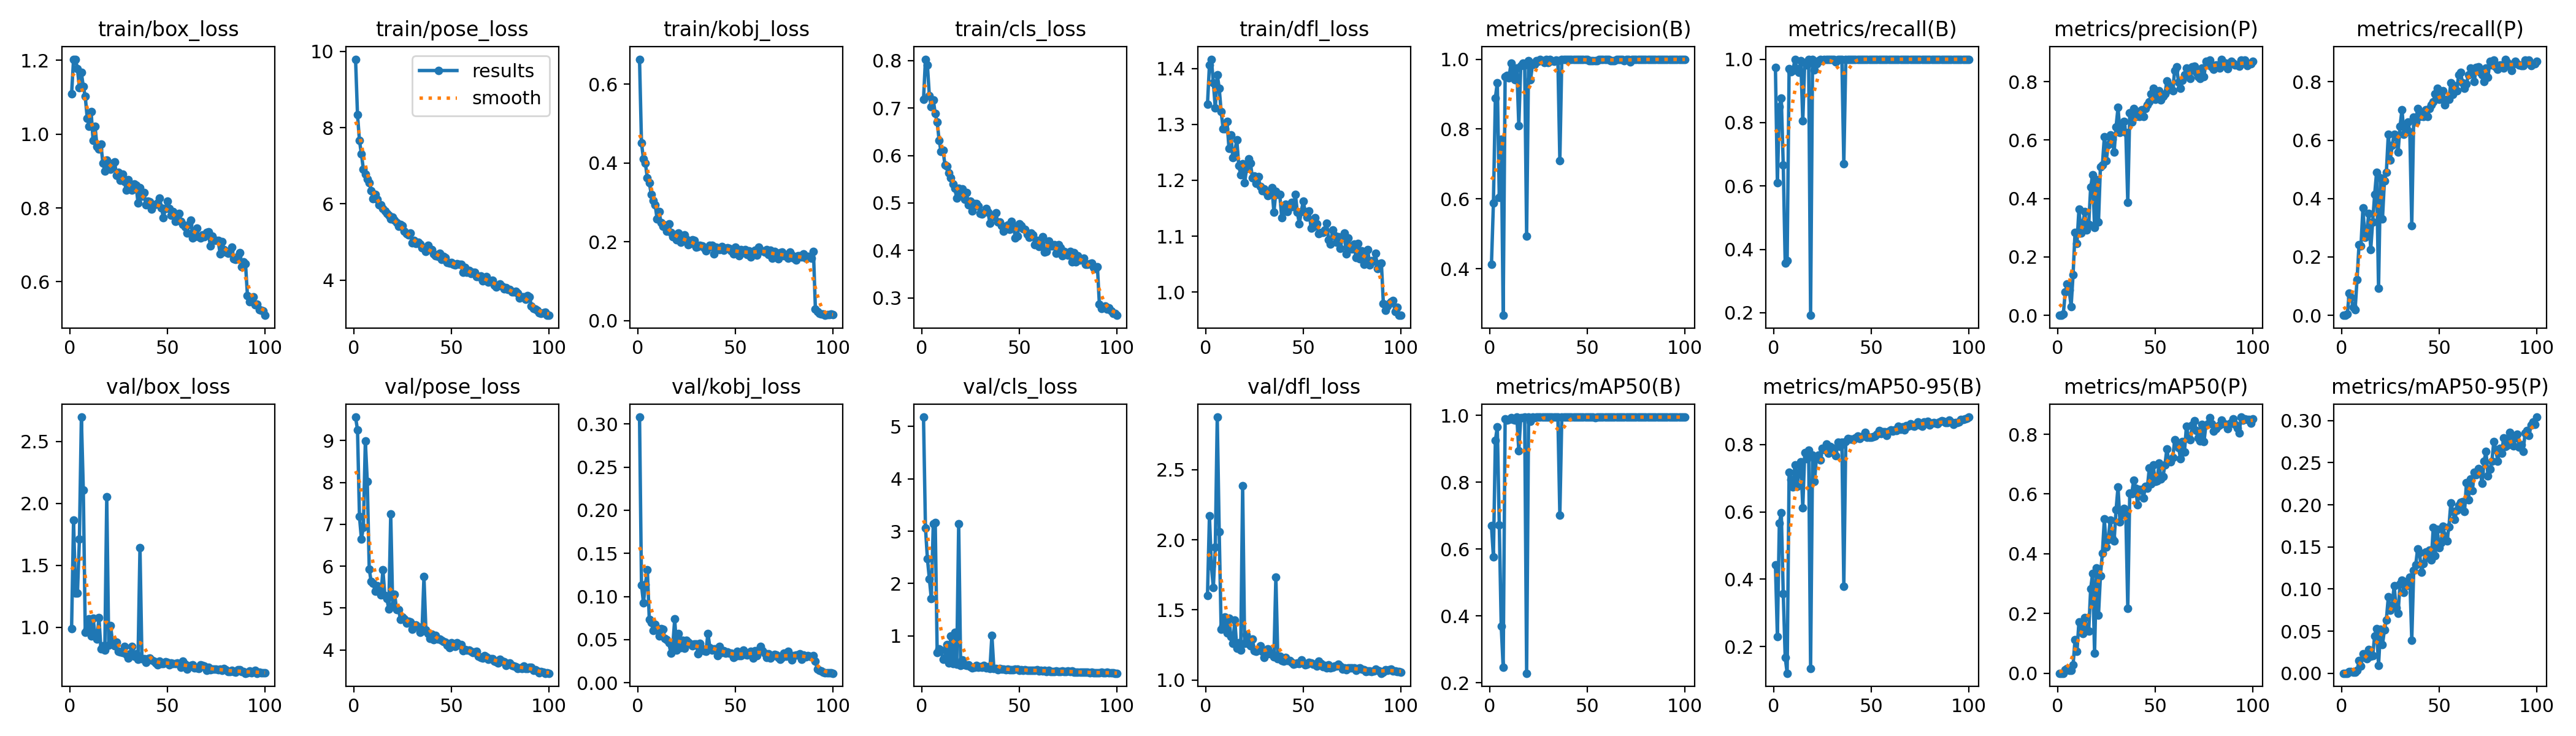

In [ ]:
from IPython.display import display, Image
Image(filename='/content/runs/pose/train4/results.png', width=10000)

In [ ]:
output = model.val()

Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-pose summary (fused): 134 layers, 20,891,344 parameters, 0 gradients, 71.4 GFLOPs


val: Scanning /content/Test-all-elements-1/valid/labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.59it/s]


                   all        261        261          1          1      0.995      0.881      0.869       0.87      0.853      0.305
Speed: 1.0ms preprocess, 15.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/pose/train42


# 300 эпох YOLO8n-pose

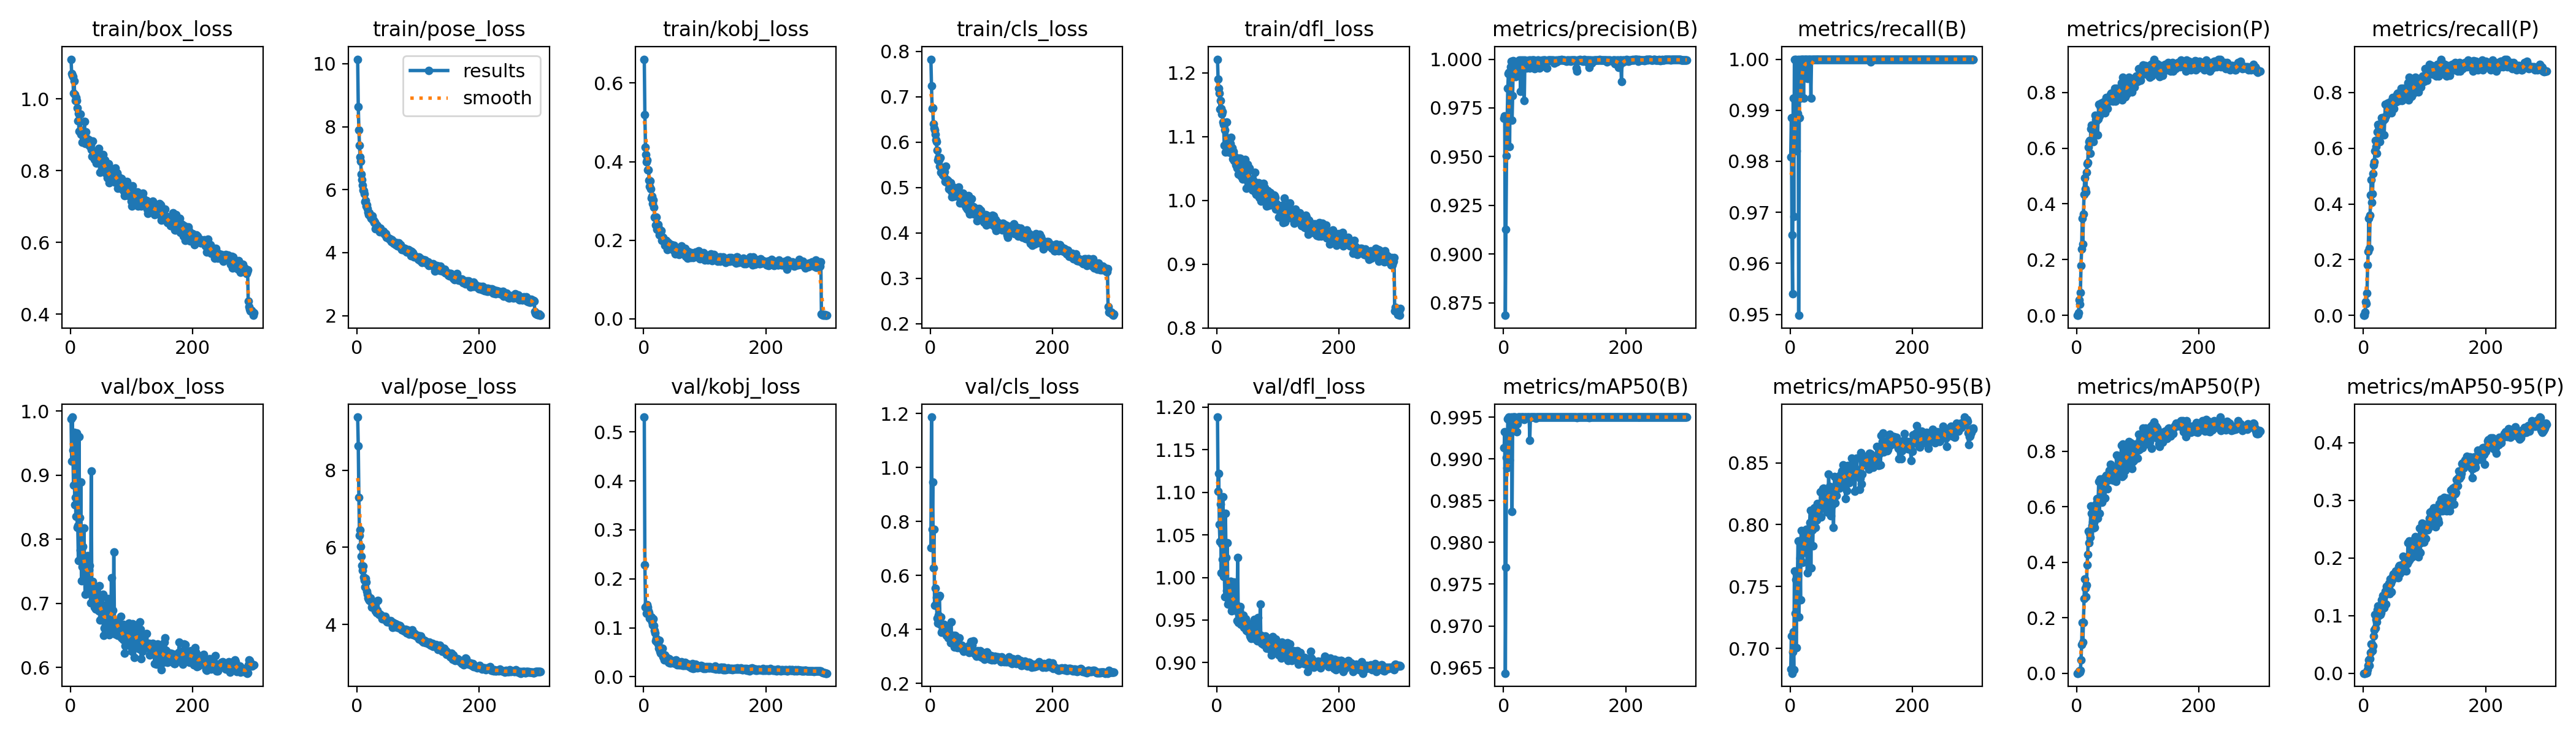

In [ ]:
from IPython.display import display, Image
Image(filename='/content/runs/pose/train/results.png', width=10000)

In [ ]:
model.val()

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-pose summary (fused): 81 layers, 3,379,496 parameters, 0 gradients, 9.6 GFLOPs


val: Scanning /content/Test-all-elements-1/valid/labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.26it/s]


                   all        261        261          1          1      0.995      0.884        0.9        0.9      0.902      0.445
Speed: 1.2ms preprocess, 3.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/pose/train2


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ed2dec4c510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    

# Обработка изображений и видео

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/pose/train/weights/best.pt')
results = model("4.png")
print(results)


image 1/1 /content/4.png: 384x640 1 person, 88.2ms
Speed: 12.2ms preprocess, 88.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'person'}
obb: None
orig_img: array([[[104, 114, 113],
        [104, 114, 113],
        [104, 114, 113],
        ...,
        [ 26,  35,  27],
        [ 26,  35,  26],
        [ 26,  35,  25]],

       [[ 92, 101, 100],
        [ 92, 101, 100],
        [ 92, 101, 100],
        ...,
        [ 26,  35,  28],
        [ 26,  35,  27],
        [ 26,  35,  26]],

       [[ 72,  81,  80],
        [ 72,  81,  80],
        [ 72,  81,  80],
        ...,
        [ 25,  33,  29],
        [ 24,  32,  27],
        [ 24,  32,  26]],

       ...,

       [[153, 158, 157],
        [152, 156, 156],
        [151, 155, 155],
        ...,
        [153, 157, 159],
        [153,

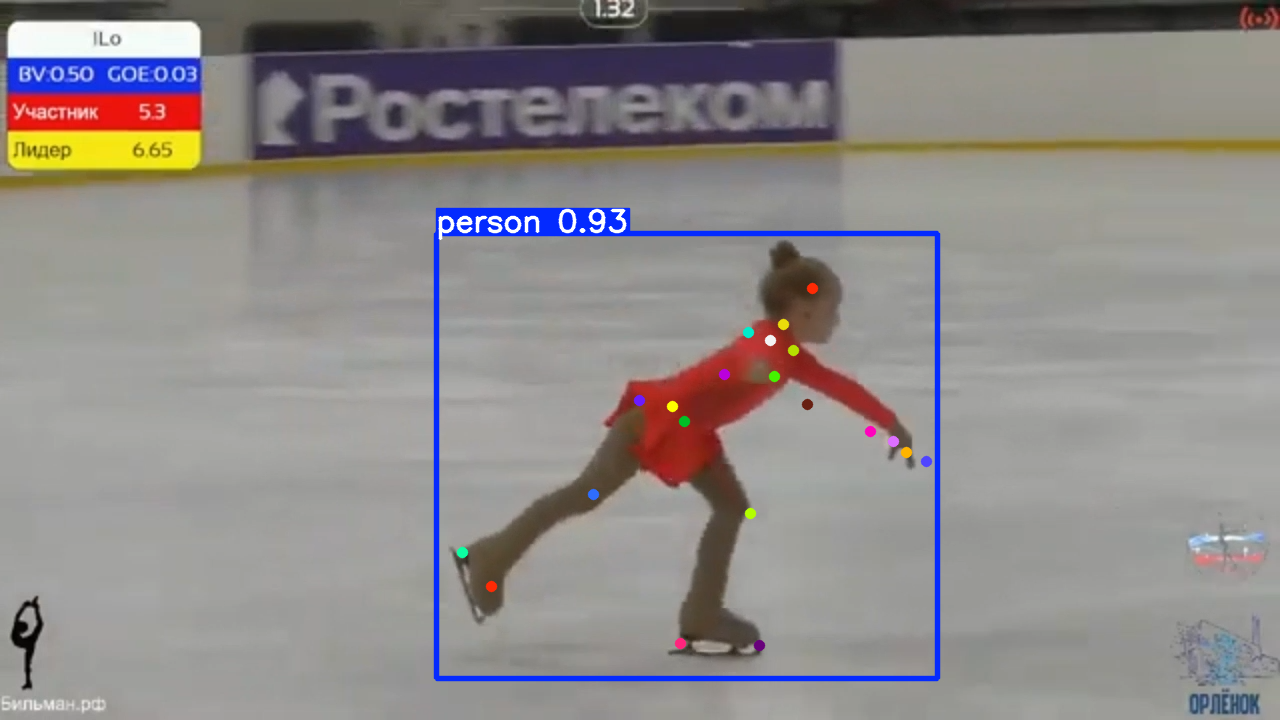

In [ ]:
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)

In [ ]:
model = YOLO('/content/runs/pose/train/weights/best.pt')
results = model.predict(conf=0.25, source='/content/Test-all-elements-1/test/images', save=True)


image 1/130 /content/Test-all-elements-1/test/images/1-Lo-_mp4-0005_jpg.rf.ee33af3ebc402142300c1bdc11f7d39b.jpg: 384x640 1 person, 11.1ms
image 2/130 /content/Test-all-elements-1/test/images/10_png.rf.59198331b6a62250d16b7302bc48cca6.jpg: 384x640 1 person, 11.5ms
image 3/130 /content/Test-all-elements-1/test/images/10_png.rf.5a214d06aedcf05e2df468dff204c956.jpg: 384x640 1 person, 17.9ms
image 4/130 /content/Test-all-elements-1/test/images/10_png.rf.8cb1ed9411f311f6e2519015e1f44076.jpg: 384x640 1 person, 15.7ms
image 5/130 /content/Test-all-elements-1/test/images/11_png.rf.2aee7de254f62ac5a9e8fe103ec76a80.jpg: 384x640 1 person, 11.3ms
image 6/130 /content/Test-all-elements-1/test/images/11_png.rf.71123b1be8504ca16e94c249f40c5597.jpg: 384x640 1 person, 15.1ms
image 7/130 /content/Test-all-elements-1/test/images/11_png.rf.94cd4f41b872cf19630ecd78d9ec8634.jpg: 384x640 1 person, 13.5ms
image 8/130 /content/Test-all-elements-1/test/images/12_png.rf.2b11b12c21a62af1a7b48d070778b6ad.jpg: 384x

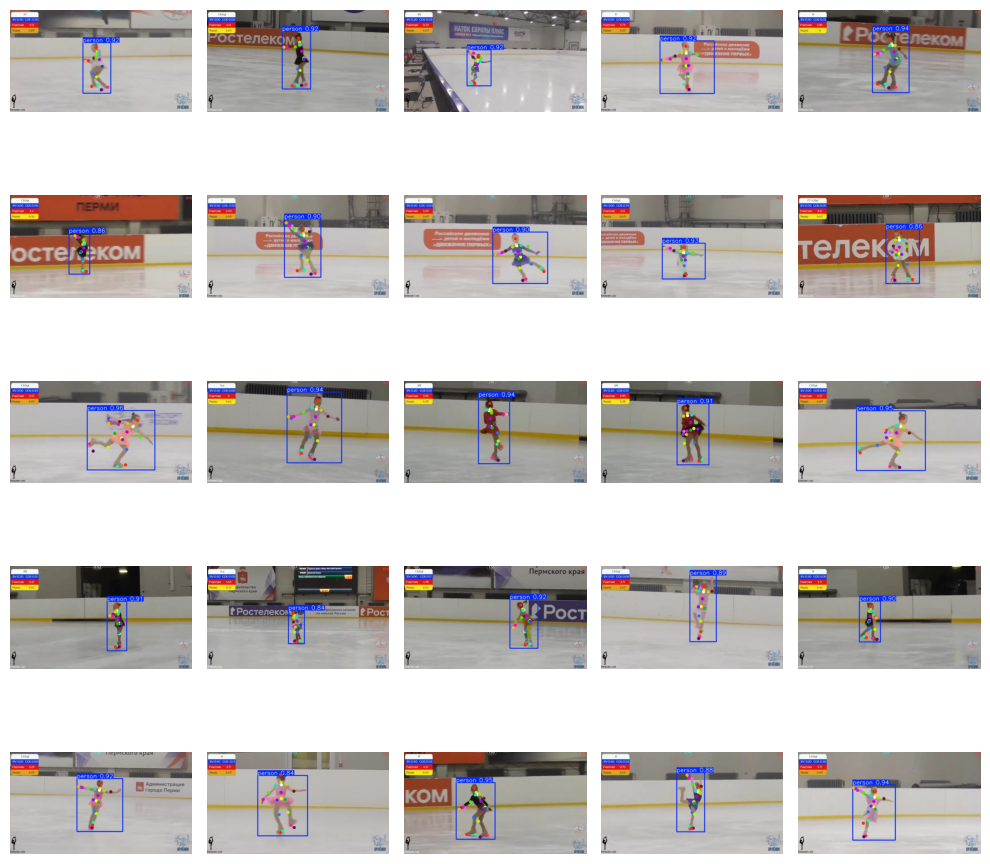

In [ ]:
import matplotlib.pyplot as plt

# Создание сетки изображений
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

# Загрузка и отображение каждой картинки
image_files = os.listdir(f'{HOME}/runs/pose/predict')

for i, ax in enumerate(axes.flat):
    image = plt.imread(f'{HOME}/runs/pose/predict/{image_files[i]}')
    ax.imshow(image)
    ax.axis('off')

# Отображение сетки изображений
plt.tight_layout()
plt.show()

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/runs/pose/train/weights/best.pt')
results = model.predict(source='/content/1Lz ГОРБУНОВА.mp4', show=True, conf=0.4, save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/127) /content/1Lz ГОРБУНОВА.mp4: 384x640 1 person, 8.1ms
video 1/1 (frame 2/127) /content/1Lz ГОРБУНОВА.mp4: 384x640 1 person, 7.2ms
video 1/1 (frame 3/127) /content/1Lz ГОРБУНОВА.mp4: 384x640 1 person, 8.3ms
video 1/1 (frame 4/127) /content/1Lz ГОРБУНОВА.mp4: 384x640 1 person, 7.4ms
video 1/1 (frame 5/127) /content/1Lz ГОРБУНОВА.mp4: 384x640 1 person, 7.7ms
vi

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/runs/pose/train2/weights/best.pt')
results = model.predict(source='/content/1F ТРУСОВА.mp4', show=True, conf=0.4, save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/134) /content/1F ТРУСОВА.mp4: 384x640 1 person, 11.8ms
video 1/1 (frame 2/134) /content/1F ТРУСОВА.mp4: 384x640 1 person, 9.7ms
video 1/1 (frame 3/134) /content/1F ТРУСОВА.mp4: 384x640 1 person, 10.1ms
video 1/1 (frame 4/134) /content/1F ТРУСОВА.mp4: 384x640 1 person, 9.7ms
video 1/1 (frame 5/134) /content/1F ТРУСОВА.mp4: 384x640 1 person, 9.6ms
video 1/1 (fram

In [ ]:
import cv2
import numpy as np
import torch
from ultralytics import YOLO

# Функция для рисования линий между ключевыми точками
def draw_skeleton(image, keypoints, confs, connections, color):
    for (p1, p2) in connections:
        if confs[p1] > 0.7 and confs[p2] > 0.7:  # Проверка уверенности точек
            x1, y1 = int(keypoints[p1][0]), int(keypoints[p1][1])
            x2, y2 = int(keypoints[p2][0]), int(keypoints[p2][1])
            if (x1, y1) != (0, 0) and (x2, y2) != (0, 0):  # Игнорирование точек в (0, 0)
                cv2.line(image, (x1, y1), (x2, y2), color, 2)

# Основная функция для обработки кадра и рисования скелета
def frame2skeleton(image, model):
    colors = {
        "green": (0, 255, 0),
        "blue": (255, 0, 0),
        "red": (0, 0, 255),
        "rose": (152, 52, 219),
        "white": (255, 255, 255),
        "lightblue": (51, 219, 0)
    }

    with torch.no_grad():
        results = model(image)[0]

        if hasattr(results, 'boxes') and hasattr(results.boxes, 'cls') and len(results.boxes.cls) > 0:
            classes_names = results.names
            classes = results.boxes.cls.cpu().numpy()
            boxes = results.boxes.xyxy.cpu().numpy().astype(np.int32)
            boxes_confs = results.boxes.conf.cpu().numpy()

            # Обработка ключевых точек
            if results.keypoints:
                keypoints = results.keypoints.data.cpu().numpy()
                confs = results.keypoints.conf.cpu().numpy()

                for i, (class_id, box_conf, box, kp, conf) in enumerate(zip(classes, boxes_confs, boxes, keypoints, confs)):
                    # Визуализация bbox
                    class_name = classes_names[int(class_id)]
                    color = colors['lightblue']
                    x1, y1, x2, y2 = box
                    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
                    cv2.putText(image, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

                    # Визуализация ключевых точек с номерами
                    for j, (point, point_conf) in enumerate(zip(kp, conf)):
                        if point_conf > 0.7:
                            x, y = int(point[0]), int(point[1])
                            if (x, y) != (0, 0):
                                cv2.circle(image, (x, y), 5, colors['white'], -1)
                                cv2.putText(image, str(j), (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors['white'], 2)

                    # Рисование скелета
                    draw_skeleton(image, kp, conf, [(6, 5), (5, 4), (4, 3), (3, 2), (2, 7), (7, 8), (8, 9), (9, 10)], colors['green'])  # Руки
                    draw_skeleton(image, kp, conf, [(16, 15), (15, 14), (14, 13), (13, 12), (12, 17), (17, 18), (18, 19), (19, 20)], colors['blue'])  # Ноги
                    draw_skeleton(image, kp, conf, [(2, 11), (11, 12)], colors['rose'])  # Тело
                    draw_skeleton(image, kp, conf, [(0, 1), (1, 2)], colors['red'])  # Голова

                return image
        else:
            return None



model = YOLO('/content/runs/pose/train2/weights/best.pt')

# Открытие видео
path = '/content/1 бильман  МАЗУНИНА.mp4'
cap = cv2.VideoCapture(path)
output_frames = []

if not cap.isOpened():
    print("Ошибка: не удалось открыть видео.")
else:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Преобразование кадра в RGB для модели
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Применение модели для отрисовки скелетов на кадре
        frame_with_skeleton = frame2skeleton(frame_rgb, model)

        if frame_with_skeleton is not None:
            # Преобразование обратно в BGR для сохранения
            frame_with_skeleton_bgr = cv2.cvtColor(frame_with_skeleton, cv2.COLOR_RGB2BGR)
            output_frames.append(frame_with_skeleton_bgr)
        else:
            print("Предупреждение: на одном из кадров нет ключевых точек")

    # Проверка на наличие обработанных кадров
    if output_frames:
        # Настройка параметров выходного видео
        height, width, layers = output_frames[0].shape
        output_video_path = path[:-4] + ' - наш скелет (21 точка).mp4'
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        video_out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (width, height))

        for frame in output_frames:
            video_out.write(frame)

        cap.release()
        video_out.release()
        print("Видео успешно сохранено по пути:", output_video_path)
    else:
        print("Ошибка: выходное видео не может быть сохранено, так как ни один кадр не был обработан.")



0: 384x640 1 person, 14.6ms
Speed: 2.1ms preprocess, 14.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.8ms
Speed: 2.4ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.9ms
Speed: 2.7ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 2.5ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 2.6ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.9ms
Speed: 2.3ms preprocess, 13.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.2ms
Speed: 2.4ms preprocess, 13.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 6